In [5]:
import plotly.graph_objects as go
import models
import diagnostics
import os
import preprocess
import plots
import utils
import numpy as np

### Setup

In [6]:
file_path = os.getenv("FILE_PATH")
SNP_file = './data/S&P 500 Index.csv'
NASDAQ_file = './data/NASDAQ Composite Index.csv'
VIX_file = './data/S&P 500 VIX.csv'

In [3]:
# Scale is applied to log returns in order to improve numerical stability of models
SCALE = 100

### S&P500

In [7]:
SNP_processed = preprocess.preprocess_data(SNP_file, 'price', 'log_returns')
SNP_processed['log_returns'] = SNP_processed['log_returns'] * SCALE

In [ ]:
snp_obj = utils.GarchFbmReturnForecast(SNP_processed)
snp_garch_fbm = utils.apply_rolling_predictions_from_start(snp_obj, '2017-01-01', 250)

# Compute log returns
snp_garch_fbm["predicted_log_returns"] = np.log(snp_garch_fbm["predicted"] / snp_garch_fbm["predicted"].shift(1))
snp_garch_fbm = snp_garch_fbm.dropna()
snp_garch_fbm = snp_garch_fbm.join(SNP_processed, how='inner')

snp_garch_fbm.head()

Day 252...
Day 253...
Day 254...
Day 255...
Day 256...
Day 257...
Day 258...
Day 259...
Day 260...
Day 261...
Day 262...
Day 263...
Day 264...
Day 265...
Day 266...
Day 267...
Day 268...
Day 269...
Day 270...
Day 271...
Day 272...
Day 273...
Day 274...
Day 275...
Day 276...
Day 277...
Day 278...
Day 279...
Day 280...
Day 281...
Day 282...
Day 283...
Day 284...
Day 285...
Day 286...
Day 287...
Day 288...
Day 289...
Day 290...
Day 291...
Day 292...
Day 293...
Day 294...
Day 295...
Day 296...
Day 297...
Day 298...
Day 299...
Day 300...
Day 301...
Day 302...
Day 303...
Day 304...
Day 305...
Day 306...
Day 307...
Day 308...
Day 309...
Day 310...
Day 311...
Day 312...
Day 313...
Day 314...
Day 315...
Day 316...
Day 317...
Day 318...
Day 319...
Day 320...
Day 321...
Day 322...
Day 323...
Day 324...
Day 325...
Day 326...
Day 327...
Day 328...
Day 329...
Day 330...
Day 331...
Day 332...
Day 333...
Day 334...
Day 335...
Day 336...
Day 337...
Day 338...
Day 339...
Day 340...
Day 341...
Day 342...

,predicted,conditional_vol,predicted_log_returns,price,log_returns
2016-01-06,3696.682127,1.058046,0.220064,1990.26,-1.320219
2016-01-07,3044.998619,0.949183,-0.193935,1943.09,-2.398579
2016-01-08,3425.571790,1.046271,0.117768,1922.03,-1.089757
2016-01-11,4691.082312,1.398749,0.314395,1923.67,0.085290
2016-01-12,3976.397679,1.294557,-0.165287,1938.68,0.777251


In [6]:
snp_garch_fbm.head()

,predicted,conditional_vol,predicted_log_returns,price,log_returns
2016-01-06,3696.682127,1.058046,0.220064,1990.26,-1.320219
2016-01-07,3044.998619,0.949183,-0.193935,1943.09,-2.398579
2016-01-08,3425.571790,1.046271,0.117768,1922.03,-1.089757
2016-01-11,4691.082312,1.398749,0.314395,1923.67,0.085290
2016-01-12,3976.397679,1.294557,-0.165287,1938.68,0.777251


In [7]:
# Rescale back conditional volatility
snp_garch_fbm_rescaled = utils.rescale_columns(
  snp_garch_fbm,
  ['conditional_vol', 'log_returns', 'predicted_log_returns'],
  SCALE
)
diagnostics.in_sample_diagnostics(snp_garch_fbm_rescaled['predicted_log_returns'], snp_garch_fbm_rescaled['log_returns'], snp_garch_fbm_rescaled['conditional_vol'])

Jarque-Bera test p-value: 0.00000
Ljung-Box (residuals) p-value, 0.34628
Ljung-Box (residuals^2) p-value, 0.00000


In [23]:
snp_garch_fbm_var = snp_garch_fbm_rescaled
snp_garch_fbm_var['VaR_99'] = snp_garch_fbm_var['predicted_log_returns'].rolling(250).quantile(0.01)  # 1st percentile
diagnostics.compute_var_violations(snp_garch_fbm_var, 'VaR_99', 'predicted_log_returns')

{'actual_exceedances': 27,
 'expected_exceedances': 20.130000000000017,
 'violation_ratio': 1.3412816691505205}

In [24]:
utils.compute_rmse(snp_garch_fbm_rescaled, 'log_returns', 'predicted_log_returns')

0.012736384404671213

In [25]:
diagnostics.bernoulli_coverage_test(snp_garch_fbm_var, var_col='VaR_99', predicted_col='predicted_log_returns')

(0.14354923600626013, 2.139493963426389)

In [11]:
diagnostics.compute_hit_rate(predicted=snp_garch_fbm_var['predicted_log_returns'], actual=snp_garch_fbm_var['log_returns'])


Hit Rate: 48.01%


0.48010610079575594

In [12]:
plots.plot_var_violations(snp_garch_fbm_var, var_col='VaR_99', predicted_col='predicted_log_returns')

### NASDAQ

In [9]:
NASDAQ_processed = preprocess.preprocess_data(NASDAQ_file, 'price', 'log_returns')
NASDAQ_processed['log_returns'] = NASDAQ_processed['log_returns'] * SCALE

nasdaq_obj = utils.GarchFbmReturnForecast(NASDAQ_processed)
nasdaq_garch_fbm = utils.apply_rolling_predictions_from_start(nasdaq_obj, '2017-01-01', 250)

Day 252...
Day 253...
Day 254...
Day 255...
Day 256...
Day 257...
Day 258...
Day 259...
Day 260...
Day 261...
Day 262...
Day 263...
Day 264...
Day 265...
Day 266...
Day 267...
Day 268...
Day 269...
Day 270...
Day 271...
Day 272...
Day 273...
Day 274...
Day 275...
Day 276...
Day 277...
Day 278...
Day 279...
Day 280...
Day 281...
Day 282...
Day 283...
Day 284...
Day 285...
Day 286...
Day 287...
Day 288...
Day 289...
Day 290...
Day 291...
Day 292...
Day 293...
Day 294...
Day 295...
Day 296...
Day 297...
Day 298...
Day 299...
Day 300...
Day 301...
Day 302...
Day 303...
Day 304...
Day 305...
Day 306...
Day 307...
Day 308...
Day 309...
Day 310...
Day 311...
Day 312...
Day 313...
Day 314...
Day 315...
Day 316...
Day 317...
Day 318...
Day 319...
Day 320...
Day 321...
Day 322...
Day 323...
Day 324...
Day 325...
Day 326...
Day 327...
Day 328...
Day 329...
Day 330...
Day 331...
Day 332...
Day 333...
Day 334...
Day 335...
Day 336...
Day 337...
Day 338...
Day 339...
Day 340...
Day 341...
Day 342...

In [10]:
nasdaq_garch_fbm.head()

,predicted,conditional_vol
2016-01-05,8766.074839,1.037799
2016-01-06,10792.820214,1.279276
2016-01-07,9515.855412,1.126508
2016-01-08,8799.482831,1.145829
2016-01-11,17966.283778,1.649862


In [11]:
# Compute log returns
nasdaq_garch_fbm["predicted_log_returns"] = np.log(nasdaq_garch_fbm["predicted"] / nasdaq_garch_fbm["predicted"].shift(1))
nasdaq_garch_fbm = nasdaq_garch_fbm.dropna()
nasdaq_garch_fbm = nasdaq_garch_fbm.join(NASDAQ_processed, how='inner')
nasdaq_garch_fbm.head()

,predicted,conditional_vol,predicted_log_returns,price,log_returns
2016-01-06,10792.820214,1.279276,0.207992,4835.77,-1.144432
2016-01-07,9515.855412,1.126508,-0.125922,4689.43,-3.072933
2016-01-08,8799.482831,1.145829,-0.078266,4643.63,-0.981465
2016-01-11,17966.283778,1.649862,0.713804,4637.99,-0.121531
2016-01-12,13243.603804,1.451577,-0.304982,4685.92,1.028119


In [12]:
# Rescale back conditional volatility
nasdaq_garch_fbm_rescaled = utils.rescale_columns(
  nasdaq_garch_fbm,
  ['conditional_vol', 'log_returns', 'predicted_log_returns'],
  SCALE
)
diagnostics.in_sample_diagnostics(nasdaq_garch_fbm['predicted_log_returns'], nasdaq_garch_fbm['log_returns'], nasdaq_garch_fbm['conditional_vol'])

Jarque-Bera test p-value: 0.00000
Ljung-Box (residuals) p-value, 0.23637
Ljung-Box (residuals^2) p-value, 0.00116


In [21]:
nasdaq_garch_fbm_with_predictions = nasdaq_garch_fbm_rescaled.dropna()
nasdaq_garch_fbm_var = nasdaq_garch_fbm_with_predictions.copy()
nasdaq_garch_fbm_var['VaR_99'] = nasdaq_garch_fbm_var['predicted_log_returns'].rolling(250).quantile(0.01)  # 1st percentile
diagnostics.compute_var_violations(nasdaq_garch_fbm_var, 'VaR_99', 'predicted_log_returns')

{'actual_exceedances': 34,
 'expected_exceedances': 20.130000000000017,
 'violation_ratio': 1.6890213611525073}

In [18]:
utils.compute_rmse(nasdaq_garch_fbm_var, 'log_returns', 'predicted_log_returns')

0.014674832125303145

In [23]:
diagnostics.compute_hit_rate(predicted=nasdaq_garch_fbm_var['predicted_log_returns'], actual=nasdaq_garch_fbm_var['log_returns'])


Hit Rate: 50.09%


0.5008841732979664

In [25]:
diagnostics.bernoulli_coverage_test(nasdaq_garch_fbm_var, var_col='VaR_99', predicted_col='predicted_log_returns')

(0.004680555085800342, 7.998908698402488)

In [27]:
plots.plot_var_violations(nasdaq_garch_fbm_var, var_col='VaR_99', predicted_col='predicted_log_returns')

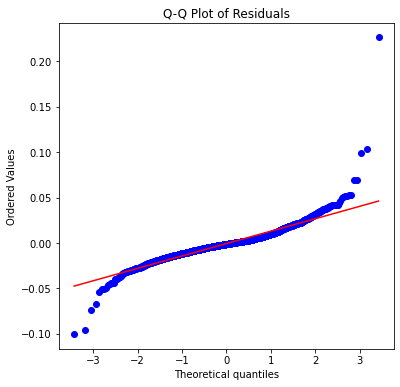

In [31]:
import matplotlib.pyplot as plt
import scipy.stats as stats  # Ensure stats module is also imported if needed

df = nasdaq_garch_fbm_var  # Assuming this DataFrame exists
df['residual'] = df['predicted_log_returns'] - df['log_returns']

plt.figure(figsize=(6, 6))
stats.probplot(df['residual'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [ ]:
plots.actual_vs_predicted_time_series_plot(
  nasdaq_garch_fbm_var,
  actual_col_name="log_returns",
  predicted_col_name="predicted_log_returns",
  var_name="Price"
)

### VIX